Importing the required libraries and loading the data.


In [129]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the TaxiData.csv file to examine its structure and contents.
file_path = 'TaxiData.csv'
taxi_data = pd.read_csv(file_path)

# Display the first few rows and column info to understand the data structure
taxi_data.head()

,pickup_community_area,fare,trip_start_month,trip_start_hour,trip_start_day,trip_start_timestamp,pickup_latitude,pickup_longitude,dropoff_latitude,dropoff_longitude,trip_miles,pickup_census_tract,dropoff_census_tract,payment_type,company,trip_seconds,dropoff_community_area,tips
0,NaN,12.45,5,19,6,1400269500,NaN,NaN,NaN,NaN,0.0,NaN,NaN,Credit Card,Chicago Elite Cab Corp. (Chicago Carriag,0.0,NaN,0.0
1,NaN,0.00,3,19,5,1362683700,NaN,NaN,NaN,NaN,0.0,NaN,NaN,Unknown,Chicago Elite Cab Corp.,300.0,NaN,0.0
2,60.0,27.05,10,2,3,1380593700,41.836150,-87.648788,NaN,NaN,12.6,NaN,NaN,Cash,Taxi Affiliation Services,1380.0,NaN,0.0
3,10.0,5.85,10,1,2,1382319000,41.985015,-87.804532,NaN,NaN,0.0,NaN,NaN,Cash,Taxi Affiliation Services,180.0,NaN,0.0
4,14.0,16.65,5,7,5,1369897200,41.968069,-87.721559,NaN,NaN,0.0,NaN,NaN,Cash,Dispatch Taxi Affiliation,1080.0,NaN,0.0


Part 3a : Histograms and box plots for fare and tips


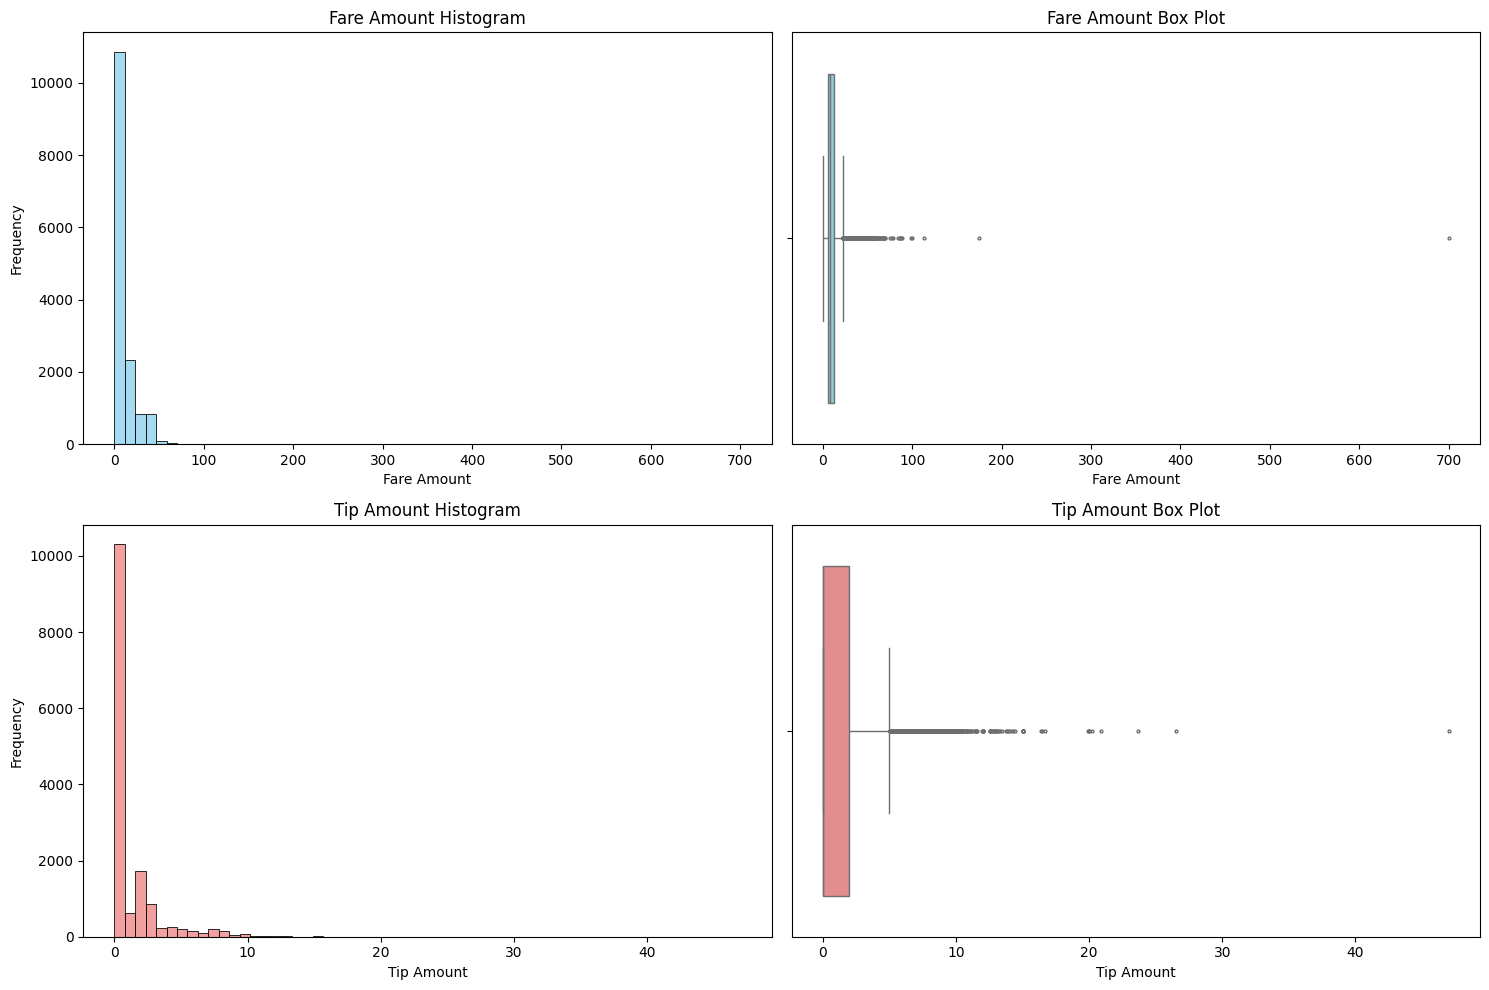

In [130]:
# Set up the visual layout
plt.figure(figsize=(15, 10))

# Histogram and Box plot for 'fare'
plt.subplot(2, 2, 1)
sns.histplot(taxi_data['fare'], bins=60, color='skyblue')
plt.title('Fare Amount Histogram')
plt.xlabel('Fare Amount')
plt.ylabel('Frequency')

plt.subplot(2, 2, 2)
sns.boxplot(x=taxi_data['fare'], color='skyblue', fliersize=2)
plt.title('Fare Amount Box Plot')
plt.xlabel('Fare Amount')

# Histogram and Box plot for 'tips'
plt.subplot(2, 2, 3)
sns.histplot(taxi_data['tips'], bins=60, color='lightcoral')
plt.title('Tip Amount Histogram')
plt.xlabel('Tip Amount')
plt.ylabel('Frequency')

plt.subplot(2, 2, 4)
sns.boxplot(x=taxi_data['tips'], color='lightcoral', fliersize=2)
plt.title('Tip Amount Box Plot')
plt.xlabel('Tip Amount')

plt.tight_layout()
plt.show()

Fare Data

1.Range:
Minimum: $0.00
Maximum: $700.07
This broad range indicates that fares vary widely, with most fares concentrated in a much lower range.

2.Outliers:
The box plot shows several high fare outliers, suggesting some long or premium rides. Outliers appear well above the 75th percentile ($12.45), often representing more expensive, less frequent trips.

3.Clusters:
Fares cluster around two regions:
Low Fare Cluster: Around the median fare ($7.85), suggesting most trips are shorter, lower-cost rides.
Moderate Fare Cluster: Between $5.85 and $12.45, capturing about half of all fares.

Tip Data

1.Range:
Minimum: $0.00
Maximum: $47.00
Similar to fares, the tip amounts show a wide range, though most values are on the lower end.

2.Outliers:
Outliers include occasional high tips, notably above $2.00, with some reaching as high as $47.00. These values indicate a minority of generous tippers.

3.Clusters:
Tips cluster at the low end, with a large concentration around $0.00, as indicated by the median. This suggests tipping may not be the norm for most customers.
A smaller cluster is found near the 75th percentile ($2.00), indicating that among those who tip, small tips are more common than large ones.

In summary:

Fares: Most are low-to-moderate, with infrequent high-cost outliers.

Tips: Many rides have no tips, with only a few high-tip outliers.


Statistical Summary of the above Fare and Tips Data


In [131]:
# Calculate statistical summaries for 'fare' and 'tips' columns
fare_summary = taxi_data['fare'].describe()
tip_summary = taxi_data['tips'].describe()

# Calculate mean, median, and standard deviation for fares and tips
fare_mean = taxi_data['fare'].mean()
fare_median = taxi_data['fare'].median()
fare_std = taxi_data['fare'].std()

tip_mean = taxi_data['tips'].mean()
tip_median = taxi_data['tips'].median()
tip_std = taxi_data['tips'].std()

# Compile results for easy reference
{
    "Fare Summary": {
        "Mean": fare_mean, 
        "Median": fare_median, 
        "Standard Deviation": fare_std,
        "Range": (fare_summary['min'], fare_summary['max']),
        "25th Percentile": fare_summary['25%'],
        "75th Percentile": fare_summary['75%']
    },
    "Tip Summary": {
        "Mean": tip_mean, 
        "Median": tip_median, 
        "Standard Deviation": tip_std,
        "Range": (tip_summary['min'], tip_summary['max']),
        "25th Percentile": tip_summary['25%'],
        "75th Percentile": tip_summary['75%']
    }
}


{'Fare Summary': {'Mean': np.float64(11.768216237834956),
  'Median': np.float64(7.85),
  'Standard Deviation': np.float64(11.538850470754118),
  'Range': (np.float64(0.0), np.float64(700.07)),
  '25th Percentile': np.float64(5.85),
  '75th Percentile': np.float64(12.45)},
 'Tip Summary': {'Mean': np.float64(1.0766744434075455),
  'Median': np.float64(0.0),
  'Standard Deviation': np.float64(2.1583404234827888),
  'Range': (np.float64(0.0), np.float64(47.0)),
  '25th Percentile': np.float64(0.0),
  '75th Percentile': np.float64(2.0)}}

Analysis

Fare Patterns: The presence of high fare outliers might indicate long-distance trips or special services. The majority of fares are relatively low.

Tip Patterns: The low median and frequent $0 tips suggest that tipping is not common across all rides, though some customers provide high tips, creating outliers.


PART 3b : Bar Chart for the frequency of the each payment method


C:\Users\Koushik\AppData\Local\Temp\ipykernel_27352\895241608.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=payment_counts.index, y=payment_counts.values, palette="viridis")


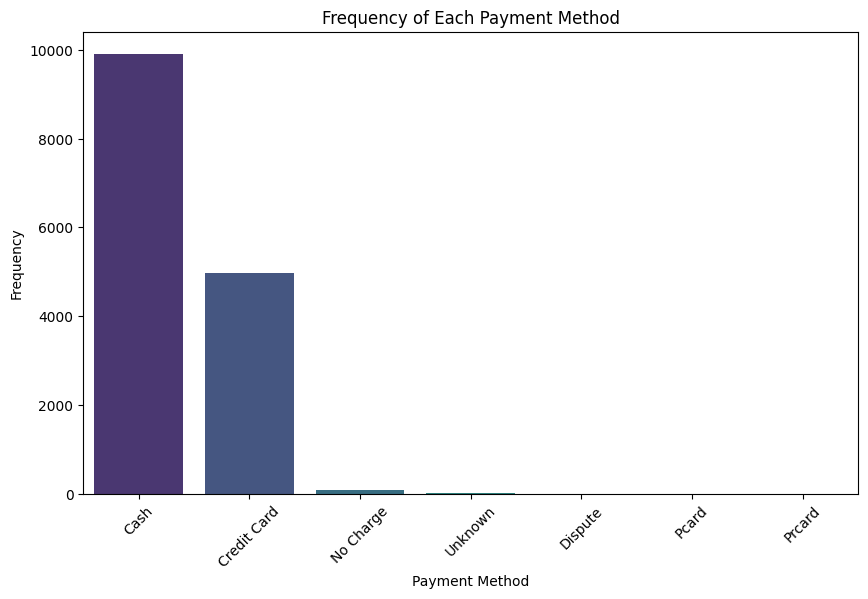

In [132]:
# Set up a figure for the bar chart
plt.figure(figsize=(10, 6))

# Count frequency of each payment method
payment_counts = taxi_data['payment_type'].value_counts()

# Plot the bar chart for payment method frequency
sns.barplot(x=payment_counts.index, y=payment_counts.values, palette="viridis")
plt.title("Frequency of Each Payment Method")
plt.xlabel("Payment Method")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.show()



From the bar chart, it appears that certain payment methods are used more frequently than others. Generally,cash and credit card payments often dominate in taxi services, which can have various impacts on service providers:

Cash Flow Management: Credit card payments offer streamlined, digital records, reducing the need for drivers to handle cash. However, processing fees for credit card transactions can slightly reduce the profits for service providers compared to cash payments.

Tips and Driver Satisfaction: Typically, credit card payments may lead to higher tips due to the convenience of adding a tip digitally. Higher tip amounts or more frequent tipping through digital payments can contribute to driver satisfaction and retention.

Security: Reduced reliance on cash payments also increases safety for drivers.

In summary, while a dominant use of credit cards can mean processing fees for service providers, it also enables better customer data tracking, potentially higher tips, and safer operations for drivers.


PART 3c : Box Plot of Tips across different Payment Methods


C:\Users\Koushik\AppData\Local\Temp\ipykernel_27352\1863176920.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='payment_type', y='tips', data=taxi_data, palette="Set2", fliersize=2)


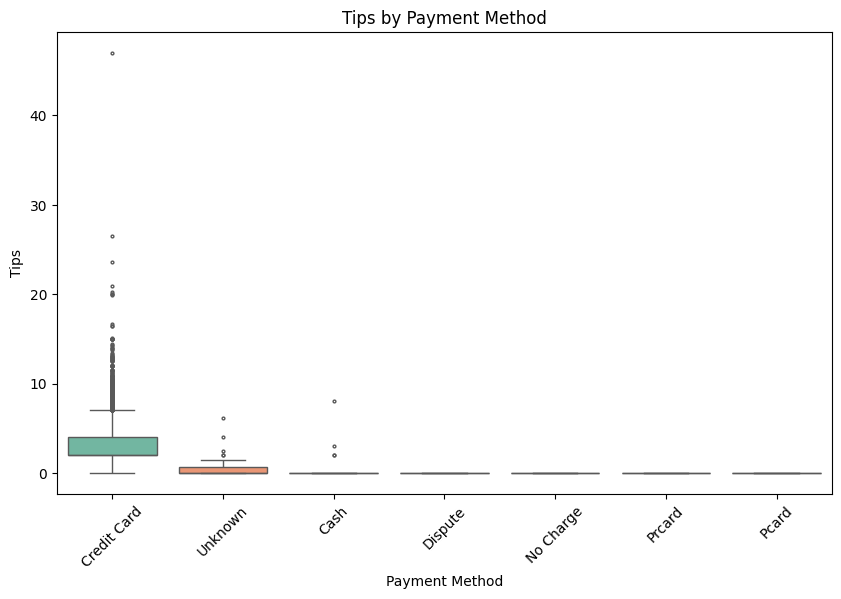

In [133]:
# Set up a figure for the box plot
plt.figure(figsize=(10, 6))

# Create a box plot of tips across different payment methods
sns.boxplot(x='payment_type', y='tips', data=taxi_data, palette="Set2", fliersize=2)
plt.title("Tips by Payment Method")
plt.xlabel("Payment Method")
plt.ylabel("Tips")
plt.xticks(rotation=45)
plt.show()


Average Tipping Amount for each payment method


In [134]:
# Calculate the average tipping amount for each payment method to summarize the data
average_tips = taxi_data.groupby('payment_type')['tips'].mean().sort_values(ascending=False)
average_tips

payment_type
Credit Card    3.239668
Unknown        0.685172
Cash           0.001519
Dispute        0.000000
No Charge      0.000000
Pcard          0.000000
Prcard         0.000000
Name: tips, dtype: float64

The average tipping amounts across payment methods show significant variation:

Credit Card : Credit cards have the highest average tipping amount. This aligns with the trend that customers may be more likely to tip when paying by card, as it’s easy to add a tip during digital payment.

Unknown : This category shows a lower average tip, which may reflect cases where tips aren’t typically added, possibly due to limited functionality in the payment process.

Cash : Cash payments have a lower average tipping amount relative to the above two methods. Tipping in cash is less predictable, and it might be underreported in digital records, especially if it’s handed directly to drivers.

Dispute, No Charge, Pcard, and Prcard: These methods show no recorded tips.

Analysis of Variations: The data indicates that digital payments, especially credit cards, are associated with higher average tips. This could mean that service providers who encourage card payments might see increased tipping, which could improve driver satisfaction. Lower tipping amounts for cash and "Unknown" payments suggest a potential lack of consistent tipping for these methods.


PART 3d : Scatter Plot between the Trip distance and Fare


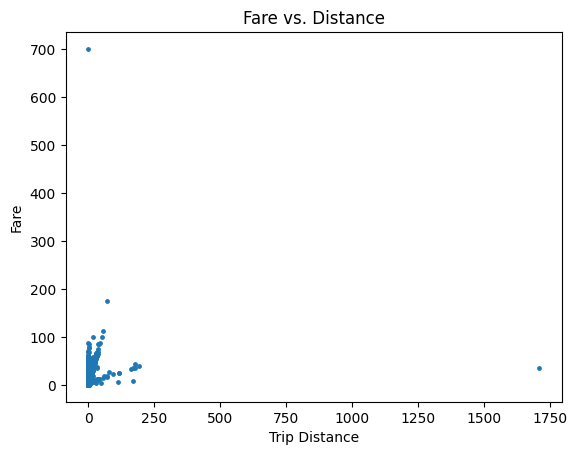

In [135]:
plt.scatter(taxi_data['trip_miles'], taxi_data['fare'], s=6)
plt.xlabel('Trip Distance')
plt.ylabel('Fare')
plt.title('Fare vs. Distance')
plt.show()

correlation coefficient between Fare and Tip distance


In [136]:
correlation = taxi_data['trip_miles'].corr(taxi_data['fare'])
print(f"Correlation coefficient: {correlation}")

Correlation coefficient: 0.22380232969278901


The correlation coefficient between fare and trip distance is approximately 0.224.

This value indicates a weak positive correlation between the two variables, meaning that as the trip distance increases, there is a tendency for the fare to increase as well. However, the relationship is not strong.

A weak correlation like this could imply that short trips might sometimes have higher fares due to factors such as minimum fare rates, traffic conditions, or additional fees, while some long-distance trips may not proportionally increase in fare.


Few key findings about the fare-distance relationship:


Weak Linear Relationship: The weak correlation suggests that while there is a slight tendency for fares to increase as trip distance increases, it’s not a strong or consistent trend.

High Variability in Short Trips: In the scatter plot, most of the data points are clustered around short distances with a wide range of fares.

Outliers and Exceptional Cases: The plot shows a few extreme cases where fares are unusually high or trips are very long. These outliers might represent exceptional situations which do not follow the general trend.


Potential Implications for Fare Pricing:


Incorporation of Base Fees and Surcharges: Since distance alone does not fully explain fare variability, fare pricing models could include additional fixed fees or surcharges. This would account for costs like pick-up fees, waiting time, and traffic delays, which may apply even when the distance is short.

Flexible Fare Structure: The weak correlation suggests that distance-based pricing alone may not capture fare dynamics well. A flexible fare structure that incorporates time-based elements (like waiting time or rush-hour fees) and dynamic pricing adjustments based on demand and traffic could more accurately reflect the actual cost of the service.

Outlier Management: Fare pricing models should account for unusual cases, like very long trips, to ensure that these outliers are handled fairly.

In summary, while distance is an important component of fare pricing, it should be integrated into a more comprehensive model that considers additional factors to better capture the true costs and improve fairness in pricing.
